In [1]:
#DB Connection 
import pymssql
import pandas as pd
import pyodbc
import numpy as np
conn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                     "Server=Martin-PC\SQLEXPRESS;"
                     "Database=FootballData;"
                     "Trusted_Connection=yes;")
#conn = pymssql.connect(server="localhost", user="",password="", port=63642)  # You can lookup the port number inside SQL server. 

data_folder = 'data/'

In [2]:
#Matches select
stmt = """SELECT Teams.FullName as HomeTeam, Teams2.FullName as AwayTeam, 
        Teams.ExternalId as HomeTeamId, Teams2.ExternalId as AwayTeamId
	  ,[Matches].ExternalId as ExternalId
      ,[Date]
      ,[Country]
      ,[League]
      ,[Season]
      ,[Stage]
      ,[AwayTeam_Id]
      ,[HomeTeam_Id]
FROM  [FootballData].[dbo].[Matches]
LEFT JOIN [Teams] ON Matches.HomeTeam_Id = Teams.Id
LEFT JOIN [Teams] as Teams2 ON Matches.AwayTeam_Id = Teams2.Id"""
# Excute Query here
df_matches = pd.read_sql(stmt,conn)
df_matches.drop_duplicates(['ExternalId'], inplace=True)
df_matches['Date']=pd.to_datetime(df_matches['Date'])
print(df_matches.shape)
df_matches.head(3)

(7750, 12)


,HomeTeam,AwayTeam,HomeTeamId,AwayTeamId,ExternalId,Date,Country,League,Season,Stage,AwayTeam_Id,HomeTeam_Id
0,Leicester,Everton,8197,8668,1723984,2014-08-18 15:00:00,England,Premier League,2014/2015,1,13,9
1,Burnley,Chelsea,8191,8455,1723983,2014-08-18 15:00:00,England,Premier League,2014/2015,1,14,10
2,Liverpool,Southampton,8650,8466,1723985,2014-08-18 15:00:00,England,Premier League,2014/2015,1,15,12


In [3]:
df_matches['Date'].min()

Timestamp('2014-08-10 15:00:00')

In [4]:
df_matches['Date'].max()

Timestamp('2019-05-12 14:00:00')

In [5]:
#Shots on select
stmt = "SELECT * FROM ShotOns"
# Excute Query here
df_shots_on = pd.read_sql(stmt,conn)
#df_corners = df_corners['Minute'].notnull()
print(df_shots_on.shape)
df_shots_on.drop_duplicates(['ExternalId'], inplace=True)

#Shots off select
stmt = "SELECT * FROM ShotOffs"
# Excute Query here
df_shots_off = pd.read_sql(stmt,conn)
#df_corners = df_corners['Minute'].notnull()
print(df_shots_off.shape)
df_shots_off.drop_duplicates(['ExternalId'], inplace=True)

#Possessions select
stmt = "SELECT * FROM Possessions"
# Excute Query here
df_possessions = pd.read_sql(stmt,conn)
#df_corners = df_corners['Minute'].notnull()
print(df_possessions.shape)
df_possessions.drop_duplicates(['ExternalId'], inplace=True)
df_possessions.replace('', np.nan, inplace=True)
df_possessions.dropna(axis=0, how='any', inplace=True)

df_possessions['HomePossession'] = df_possessions['HomePossession'].astype(int)
df_possessions['AwayPossession'] = df_possessions['AwayPossession'].astype(int)
df_possessions['Minute'] = df_possessions['Minute'].astype(int)
#df_possessions['TeamId'] = df_possessions['TeamId'].astype(str)
df_possessions.sample(5)


(83999, 6)
(82698, 6)
(104795, 7)


,Id,ExternalId,MatchId,Minute,HomePossession,AwayPossession,TeamId
23575,23576,5608920,1990109,45,48,52,0
101845,101846,9473086,2782309,75,70,30,0
78144,78145,6424716,2300743,90,41,59,0
84183,84184,7510596,2580724,25,42,58,0
41102,41103,5265253,2002267,45,59,41,0


In [6]:
#Goals select
stmt = "SELECT * FROM Goals"
# Excute Query here
df_goals = pd.read_sql(stmt,conn)
print(df_goals.shape)
df_goals.drop('Id', inplace=True, axis=1)
df_goals.drop_duplicates(inplace=True)

(22244, 8)


In [7]:
#Corners select
stmt = "SELECT * FROM Corners"
# Excute Query here
df_corners = pd.read_sql(stmt,conn)
#df_corners = df_corners['Minute'].notnull()
print(df_corners.shape)
df_corners.drop_duplicates(['ExternalId'], inplace=True)
df_corners.sample(3)

(78204, 6)


,Id,ExternalId,MatchId,Minute,Player1,TeamId
17836,17837,4116414,1709918,28,157859,9853
27924,27925,7411058,2525251,47,230900,9747
56188,56189,7565869,2588541,60,304733,8564


In [8]:
#Teams select
stmt = "SELECT DISTINCT ExternalId FROM Teams"
# Excute Query here
df_teams = pd.read_sql(stmt,conn)
print(df_teams.shape)
df_teams.head(2)
#df_teams.count

(135, 1)


,ExternalId
0,10242
1,9941


In [9]:
# Group by corners teams matches not working
# stmt = """SELECT  Corners.TeamId, convert (bigint, minute  ) as Minute, count(*) as count
#   FROM [FootballData].[dbo].[Corners] 
#   LEFT JOIN [Teams] ON Corners.TeamId = Teams.ExternalId
#   LEFT JOIN [Matches] ON MatchId = Corners.MatchId
#   group by convert (bigint, minute  ),TeamId
#   order by 1,2"""
# # Excute Query here

#Corners select
stmt = """SELECT DISTINCT  Matches.Id as MatchId, Corners.ExternalId, convert (bigint,  Corners.Minute) as Minute, Teams.ExternalId as TeamId,
    Teams.FullName, Teams.Acronym,Matches.Season
 FROM [FootballData].[dbo].[Teams]
RIGHT JOIN [Corners] ON Corners.TeamId = Teams.ExternalId
LEFT JOIN [Matches] ON [Matches].ExternalId = Corners.MatchId

AND Matches.Season = '2018/2019'
"""
#WHERE League like 'Premier League'
df_corners_per_team = pd.read_sql(stmt,conn)
#df_corners = df_corners['Minute'].notnull()

df_corners_per_team.drop_duplicates(['ExternalId'], inplace=True)
print(df_corners_per_team.shape)
df_corners_per_team.sample(3)

(77384, 7)


,MatchId,ExternalId,Minute,TeamId,FullName,Acronym,Season
30311,NaN,5164134,76,8535,Fiorentina,FIO,None
33808,NaN,5316460,40,208931,Carpi,CAP,None
41023,NaN,5805000,74,8634,Barcelona,BAR,None


In [10]:
stmt = """SELECT DISTINCT  Matches.EXTERNALID as MatchId, Corners.MatchId as CornerMatchId, convert (bigint,  Corners.Minute) as Minute, Teams.ExternalId as TeamId,
    Teams.FullName,Matches.Season
From MAtches 
 LEFT Join 
	(SELECT MatchId, TeamId, Min(Minute) as Minute
            FROM Corners
            GROUP BY MatchId, TeamId) Corners
ON Corners.MatchID= MAtches.eXTERNALId
LEFT JOIN [FootballData].[dbo].[Teams]
on Matches.HomeTeam_Id = Teams.Id OR Matches.AwayTeam_Id = Teams.ID
"""
#WHERE CORNERS.MATCHID IS NULL 
#WHERE League like 'Premier League'

df_first_corner = pd.read_sql(stmt,conn)
#df_corners = df_corners['Minute'].notnull()

df_first_corner.head(5)

,MatchId,CornerMatchId,Minute,TeamId,FullName,Season
0,1709697,1709697.0,15.0,9837,Reims,2014/2015
1,1709697,1709697.0,15.0,9847,Paris Saint Germain,2014/2015
2,1709697,1709697.0,52.0,9837,Reims,2014/2015
3,1709697,1709697.0,52.0,9847,Paris Saint Germain,2014/2015
4,1709698,1709698.0,20.0,7794,SC Bastia,2014/2015


In [11]:
stmt = """
SELECT DISTINCT  Matches.EXTERNALID as MatchId, Goals.MatchId as CornerMatchId, convert (bigint,  Goals.Minute) as Minute, Teams.ExternalId as TeamId, Teams2.FullName,
    Teams.FullName,Matches.Season
From MAtches 
 left Join 
	(SELECT MatchId, TeamId, Min(Minute) as Minute
            FROM Goals
            GROUP BY MatchId, TeamId) Goals
ON Goals.MatchID= MAtches.eXTERNALId
LEFT JOIN [Teams] ON Matches.HomeTeam_Id = Teams.Id
LEFT JOIN [Teams] as Teams2 ON Matches.AwayTeam_Id = Teams2.Id
"""
#WHERE CORNERS.MATCHID IS NULL 
#WHERE League like 'Premier League'

df_first_goal = pd.read_sql(stmt,conn)
#df_corners = df_corners['Minute'].notnull()

df_first_goal.head(20)

,MatchId,CornerMatchId,Minute,TeamId,FullName,FullName,Season
0,1709697,1709697.0,19.0,9837,Paris Saint Germain,Reims,2014/2015
1,1709697,1709697.0,22.0,9837,Paris Saint Germain,Reims,2014/2015
2,1709698,1709698.0,12.0,7794,Marseille,SC Bastia,2014/2015
3,1709698,1709698.0,17.0,7794,Marseille,SC Bastia,2014/2015
4,1709699,1709699.0,12.0,4087,Caen,Evian Thonon Gaillard,2014/2015
5,1709700,1709700.0,39.0,9747,Saint-Etienne,Guingamp,2014/2015
6,1709701,NaN,NaN,8639,Metz,Lille,2014/2015
7,1709702,1709702.0,64.0,9748,Rennes,Lyon,2014/2015
8,1709703,1709703.0,10.0,9829,Lorient,Monaco,2014/2015
9,1709703,1709703.0,78.0,9829,Lorient,Monaco,2014/2015


In [12]:
stmt = """SELECT EXTERNALID FROM MATCHES 
EXCEPT 
SELECT MATCHID FROM CORNERS
"""
#WHERE CORNERS.MATCHID IS NULL 
#WHERE League like 'Premier League'

df_matches_no_corner = pd.read_sql(stmt,conn)
#df_corners = df_corners['Minute'].notnull()
df_matches_no_corner.shape

(6, 1)

In [13]:
stmt = """SELECT EXTERNALID FROM MATCHES 
EXCEPT 
SELECT MATCHID FROM GOALS
"""
#WHERE CORNERS.MATCHID IS NULL 
#WHERE League like 'Premier League'

df_matches_no_goals = pd.read_sql(stmt,conn)
#df_corners = df_corners['Minute'].notnull()
df_matches_no_goals.shape

(513, 1)

In [14]:
#df_teams_corners_per_minute['Season'] == '2016/2017'
#df_teams_corners_per_minute = df_teams_corners_per_minute[(df_teams_corners_per_minute['League'] == 'Premier League') ]

#print(df_teams_corners_per_minute.head(5))
#df_teams_corners_per_minute.head()

groups = df_corners_per_team.groupby(['FullName'])

print(groups.head())
groups.describe()
import matplotlib.pyplot as plt
for group in groups:
    #figure()
    #plt.
    print(group[1].FullName.values[0])
    plt.hist(group[1].Minute, bins=45)
    #cumulative=1, density=True, histtype='step'
    axes = plt.gca()
    axes.set_xlim([0,90])
    #axes.set_ylim([0,50])
    plt.show()
   


       MatchId ExternalId  Minute  TeamId                 FullName Acronym  \
0          NaN    3631175      15    9847      Paris Saint Germain     PSG   
1          NaN    3631254      44    9847      Paris Saint Germain     PSG   
2          NaN    3631293      51    9847      Paris Saint Germain     PSG   
3          NaN    3631297      52    9837                    Reims     REI   
4          NaN    3631347      73    9847      Paris Saint Germain     PSG   
5          NaN    3631409      90    9847      Paris Saint Germain     PSG   
6          NaN    3633517       3    None                     None    None   
7          NaN    3633530       4    9831                     Nice     NIC   
8          NaN    3633536       5    9831                     Nice     NIC   
9          NaN    3633540       5    9831                     Nice     NIC   
10         NaN    3633542       5    9831                     Nice     NIC   
11         NaN    3633590       9    8639                    Lil

<Figure size 640x480 with 1 Axes>

Almeria


<Figure size 640x480 with 1 Axes>

Amiens


<Figure size 640x480 with 1 Axes>

Angers


<Figure size 640x480 with 1 Axes>

Arsenal


<Figure size 640x480 with 1 Axes>

Aston Villa


<Figure size 640x480 with 1 Axes>

Atalanta


<Figure size 640x480 with 1 Axes>

Athletic Bilbao


<Figure size 640x480 with 1 Axes>

Atletico Madrid


<Figure size 640x480 with 1 Axes>

Augsburg


<Figure size 640x480 with 1 Axes>

Barcelona


<Figure size 640x480 with 1 Axes>

Bayer Leverkusen


<Figure size 640x480 with 1 Axes>

Bayern Munich


<Figure size 640x480 with 1 Axes>

Benevento


<Figure size 640x480 with 1 Axes>

Bologna


<Figure size 640x480 with 1 Axes>

Bordeaux


<Figure size 640x480 with 1 Axes>

Borussia Dortmund


<Figure size 640x480 with 1 Axes>

Borussia Moenchengladbach


<Figure size 640x480 with 1 Axes>

Bournemouth


<Figure size 640x480 with 1 Axes>

Brighton


<Figure size 640x480 with 1 Axes>

Burnley


<Figure size 640x480 with 1 Axes>

Caen


<Figure size 640x480 with 1 Axes>

Cagliari


<Figure size 640x480 with 1 Axes>

Cardiff


<Figure size 640x480 with 1 Axes>

Carpi


<Figure size 640x480 with 1 Axes>

Celta Vigo


<Figure size 640x480 with 1 Axes>

Cesena


<Figure size 640x480 with 1 Axes>

Chelsea


<Figure size 640x480 with 1 Axes>

Chievo


<Figure size 640x480 with 1 Axes>

Cordoba


<Figure size 640x480 with 1 Axes>

Crotone


<Figure size 640x480 with 1 Axes>

Crystal Palace


<Figure size 640x480 with 1 Axes>

Darmstadt


<Figure size 640x480 with 1 Axes>

Deportivo Alaves


<Figure size 640x480 with 1 Axes>

Deportivo La Coruna


<Figure size 640x480 with 1 Axes>

Dijon


<Figure size 640x480 with 1 Axes>

Eibar


<Figure size 640x480 with 1 Axes>

Eintracht Frankfurt


<Figure size 640x480 with 1 Axes>

Elche


<Figure size 640x480 with 1 Axes>

Empoli


<Figure size 640x480 with 1 Axes>

Espanyol


<Figure size 640x480 with 1 Axes>

Everton


<Figure size 640x480 with 1 Axes>

Evian Thonon Gaillard


<Figure size 640x480 with 1 Axes>

FC Cologne


<Figure size 640x480 with 1 Axes>

Fiorentina


<Figure size 640x480 with 1 Axes>

Freiburg


<Figure size 640x480 with 1 Axes>

Frosinone


<Figure size 640x480 with 1 Axes>

Fulham


<Figure size 640x480 with 1 Axes>

GFC Ajaccio


<Figure size 640x480 with 1 Axes>

Genoa


<Figure size 640x480 with 1 Axes>

Getafe


<Figure size 640x480 with 1 Axes>

Girona


<Figure size 640x480 with 1 Axes>

Granada


<Figure size 640x480 with 1 Axes>

Guingamp


<Figure size 640x480 with 1 Axes>

Hamburger SV


<Figure size 640x480 with 1 Axes>

Hannover 96


<Figure size 640x480 with 1 Axes>

Hertha Berlin


<Figure size 640x480 with 1 Axes>

Hoffenheim


<Figure size 640x480 with 1 Axes>

Huddersfield


<Figure size 640x480 with 1 Axes>

Hull


<Figure size 640x480 with 1 Axes>

Ingolstadt


<Figure size 640x480 with 1 Axes>

Inter


<Figure size 640x480 with 1 Axes>

Juventus


<Figure size 640x480 with 1 Axes>

Las Palmas


<Figure size 640x480 with 1 Axes>

Lazio


<Figure size 640x480 with 1 Axes>

Leganes


<Figure size 640x480 with 1 Axes>

Leicester


<Figure size 640x480 with 1 Axes>

Lens


<Figure size 640x480 with 1 Axes>

Levante


<Figure size 640x480 with 1 Axes>

Lille


<Figure size 640x480 with 1 Axes>

Liverpool


<Figure size 640x480 with 1 Axes>

Lorient


<Figure size 640x480 with 1 Axes>

Lyon


<Figure size 640x480 with 1 Axes>

Mainz 05


<Figure size 640x480 with 1 Axes>

Malaga


<Figure size 640x480 with 1 Axes>

Manchester City


<Figure size 640x480 with 1 Axes>

Manchester United


<Figure size 640x480 with 1 Axes>

Marseille


<Figure size 640x480 with 1 Axes>

Metz


<Figure size 640x480 with 1 Axes>

Middlesbrough


<Figure size 640x480 with 1 Axes>

Monaco


<Figure size 640x480 with 1 Axes>

Montpellier


<Figure size 640x480 with 1 Axes>

Nancy


<Figure size 640x480 with 1 Axes>

Nantes


<Figure size 640x480 with 1 Axes>

Newcastle United


<Figure size 640x480 with 1 Axes>

Nice


<Figure size 640x480 with 1 Axes>

Nimes


<Figure size 640x480 with 1 Axes>

Norwich


<Figure size 640x480 with 1 Axes>

Osasuna


<Figure size 640x480 with 1 Axes>

Paderborn


<Figure size 640x480 with 1 Axes>

Palermo


<Figure size 640x480 with 1 Axes>

Paris Saint Germain


<Figure size 640x480 with 1 Axes>

Parma


<Figure size 640x480 with 1 Axes>

Parma Calcio 1913


<Figure size 640x480 with 1 Axes>

Pescara


<Figure size 640x480 with 1 Axes>

Queens Park Rangers


<Figure size 640x480 with 1 Axes>

RasenBallsport Leipzig


<Figure size 640x480 with 1 Axes>

Rayo Vallecano


<Figure size 640x480 with 1 Axes>

Real Betis


<Figure size 640x480 with 1 Axes>

Real Madrid


<Figure size 640x480 with 1 Axes>

Real Sociedad


<Figure size 640x480 with 1 Axes>

Real Valladolid


<Figure size 640x480 with 1 Axes>

Reims


<Figure size 640x480 with 1 Axes>

Rennes


<Figure size 640x480 with 1 Axes>

Roma


<Figure size 640x480 with 1 Axes>

SC Bastia


<Figure size 640x480 with 1 Axes>

SPAL 2013


<Figure size 640x480 with 1 Axes>

SSC Napoli


<Figure size 640x480 with 1 Axes>

Saint-Etienne


<Figure size 640x480 with 1 Axes>

Sampdoria


<Figure size 640x480 with 1 Axes>

Sassuolo


<Figure size 640x480 with 1 Axes>

Schalke 04


<Figure size 640x480 with 1 Axes>

Sevilla


<Figure size 640x480 with 1 Axes>

Southampton


<Figure size 640x480 with 1 Axes>

Sporting Gijon


<Figure size 640x480 with 1 Axes>

Stoke


<Figure size 640x480 with 1 Axes>

Strasbourg


<Figure size 640x480 with 1 Axes>

Sunderland


<Figure size 640x480 with 1 Axes>

Swansea


<Figure size 640x480 with 1 Axes>

Torino


<Figure size 640x480 with 1 Axes>

Tottenham


<Figure size 640x480 with 1 Axes>

Toulouse


<Figure size 640x480 with 1 Axes>

Troyes


<Figure size 640x480 with 1 Axes>

Udinese


<Figure size 640x480 with 1 Axes>

Valencia


<Figure size 640x480 with 1 Axes>

Verona


<Figure size 640x480 with 1 Axes>

VfB Stuttgart


<Figure size 640x480 with 1 Axes>

Villarreal


<Figure size 640x480 with 1 Axes>

Watford


<Figure size 640x480 with 1 Axes>

Werder Bremen


<Figure size 640x480 with 1 Axes>

West Bromwich Albion


<Figure size 640x480 with 1 Axes>

West Ham


<Figure size 640x480 with 1 Axes>

Wolfsburg


<Figure size 640x480 with 1 Axes>

Wolverhampton Wanderers


<Figure size 640x480 with 1 Axes>

In [26]:
#df_teams_corners_per_minute['Minute'].hist(by=df_teams_corners_per_minute['count'])

In [27]:
stmt = """SELECT DISTINCT  Matches.Id as MatchId, Goals.ExternalId, convert (bigint,  Goals.Minute) as Minute, Teams.ExternalId as TeamId,
    Teams.FullName, Teams.Acronym,Matches.Season
 FROM [FootballData].[dbo].[Teams]
RIGHT JOIN [Goals] ON Goals.TeamId = Teams.ExternalId
LEFT JOIN [Matches] ON [Matches].ExternalId = Goals.MatchId
AND Matches.Season = '2018/2019'
"""
#WHERE League like 'Premier League'

df_goals_per_team = pd.read_sql(stmt,conn)
#df_goals_per_team = df_goals_per_team['Minute'].notnull()

df_goals_per_team.drop_duplicates(['ExternalId'], inplace=True)
print(df_goals_per_team.shape)
df_goals_per_team.sample(10)

(21985, 7)


,MatchId,ExternalId,Minute,TeamId,FullName,Acronym,Season
15112,NaN,6449564,42,8529,Cagliari,CAG,None
8629,NaN,5219799,47,8581,Levante,LEV,None
12895,NaN,6126964,84,8472,Sunderland,SUN,None
13769,NaN,6232717,78,8654,West Ham,WHU,None
10262,NaN,5502374,64,9837,Reims,REI,None
4069,NaN,4289861,30,9788,Borussia Moenchengladbach,GLA,None
20500,NaN,7589762,22,10261,Newcastle United,NCU,None
13472,NaN,6201207,87,8600,Udinese,UDI,None
6104,NaN,4793085,76,8721,Wolfsburg,WOL,None
20263,NaN,7556271,90,9789,Borussia Dortmund,BVB,None


       MatchId ExternalId  Minute  TeamId                 FullName Acronym  \
0          NaN    3631155       7    9847      Paris Saint Germain     PSG   
1          NaN    3631192      19    9847      Paris Saint Germain     PSG   
2          NaN    3631201      22    9837                    Reims     REI   
3          NaN    3631233      34    9837                    Reims     REI   
4          NaN    3631325      63    9847      Paris Saint Germain     PSG   
5          NaN    3633614       9    7794                SC Bastia     BBO   
6          NaN    3633645      12    7819                     Caen     CAE   
7          NaN    3633655      12    8592                Marseille     MAR   
8          NaN    3633713      17    9827                 Bordeaux     BOR   
9          NaN    3633733      17    7794                SC Bastia     BBO   
10         NaN    3633808      23    9831                     Nice     NIC   
11         NaN    3633950      32    7819                     Ca

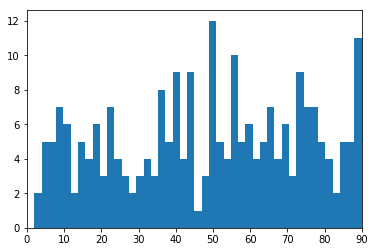

Almeria


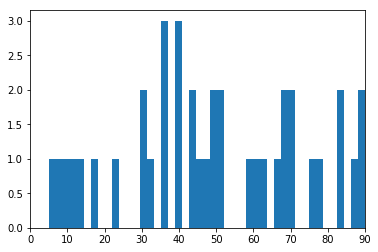

Amiens


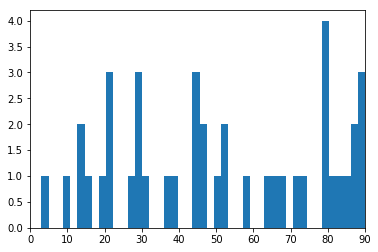

Angers


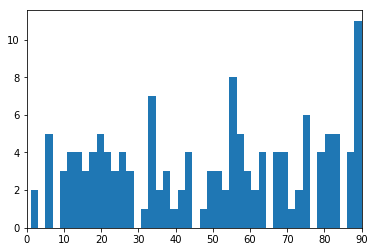

Arsenal


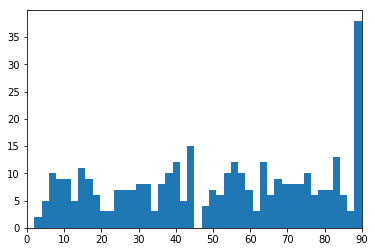

Aston Villa


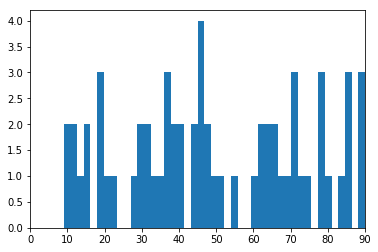

Atalanta


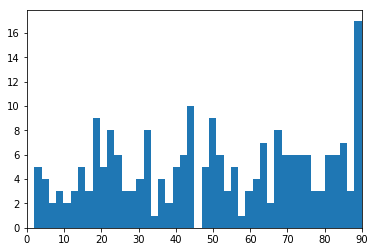

Athletic Bilbao


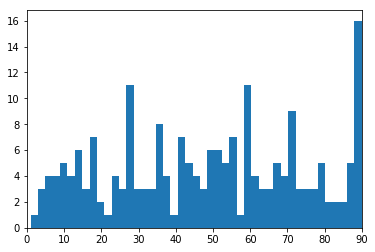

Atletico Madrid


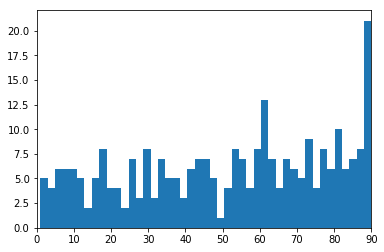

Augsburg


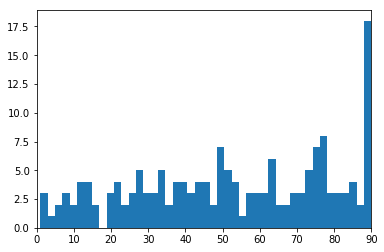

Barcelona


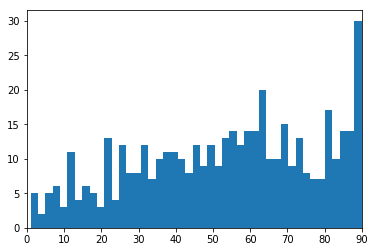

Bayer Leverkusen


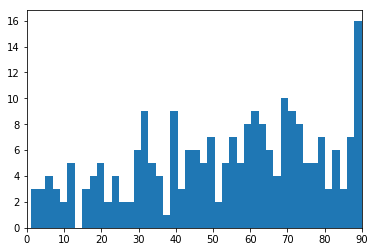

Bayern Munich


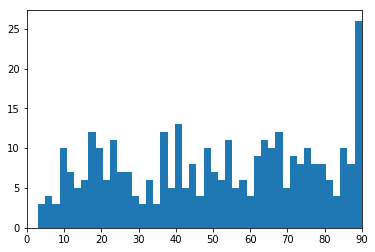

Benevento


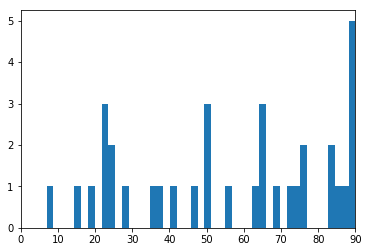

Bologna


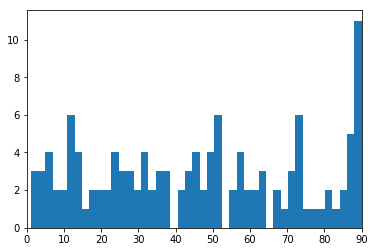

Bordeaux


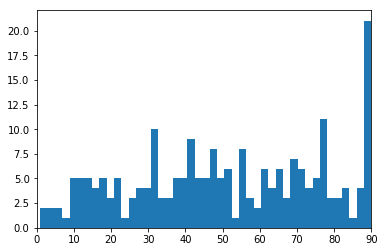

Borussia Dortmund


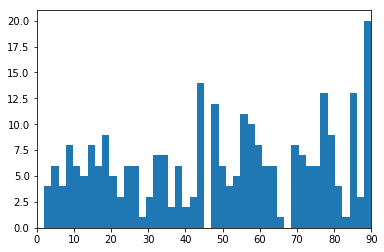

Borussia Moenchengladbach


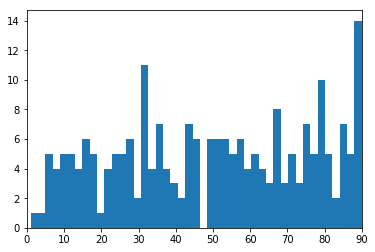

Bournemouth


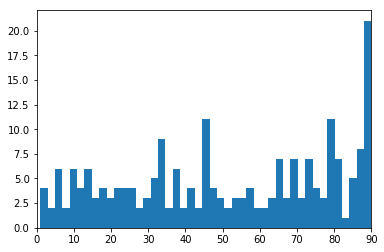

Brighton


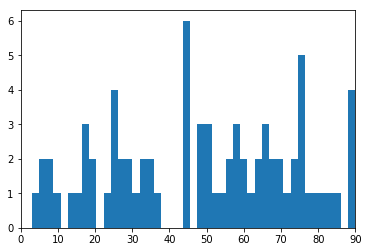

Burnley


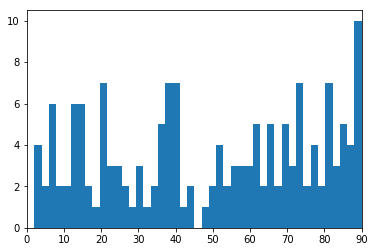

Caen


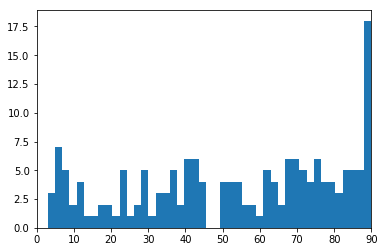

Cagliari


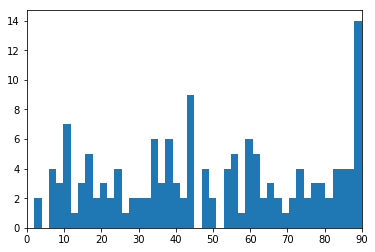

Cardiff


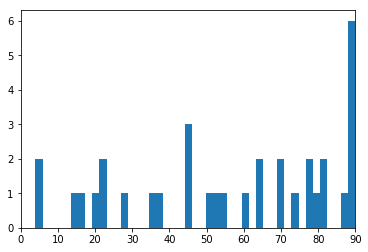

Carpi


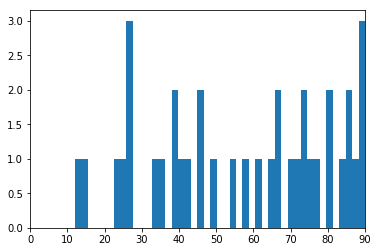

Celta Vigo


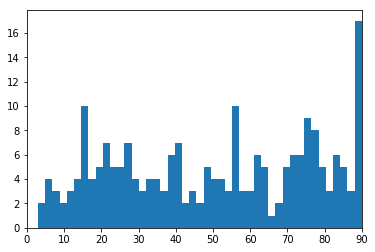

Cesena


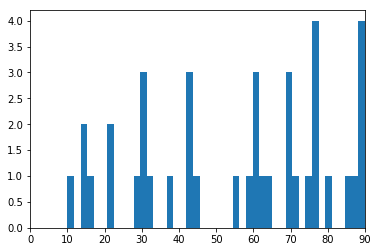

Chelsea


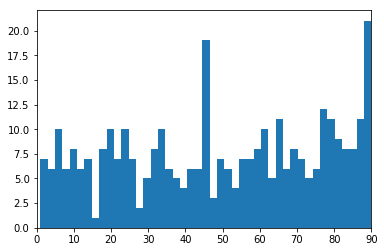

Chievo


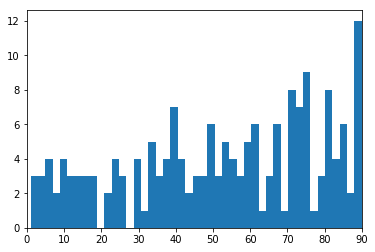

Cordoba


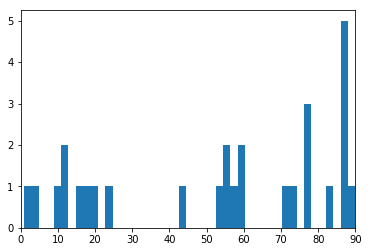

Crotone


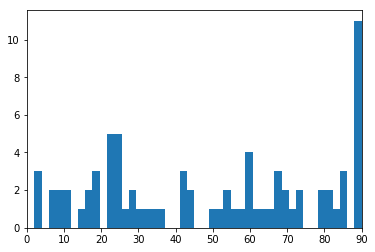

Crystal Palace


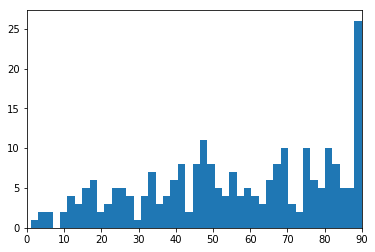

Darmstadt


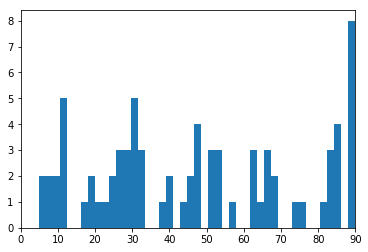

Deportivo Alaves


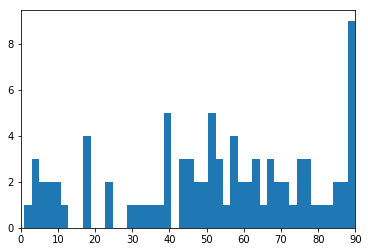

Deportivo La Coruna


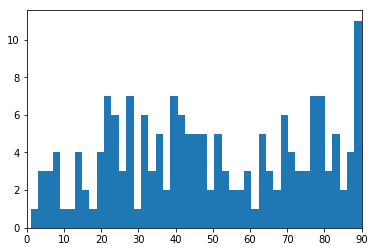

Dijon


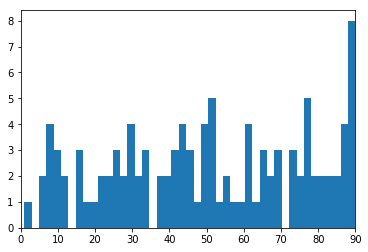

Eibar


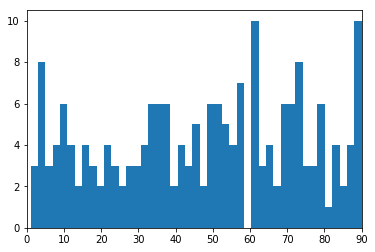

Eintracht Frankfurt


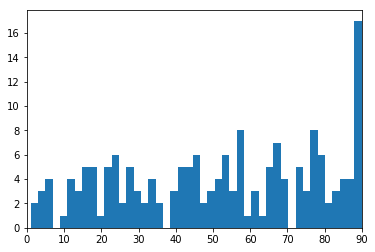

Elche


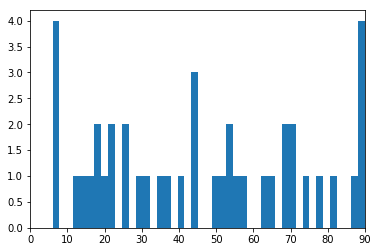

Empoli


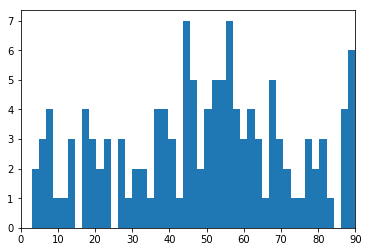

Espanyol


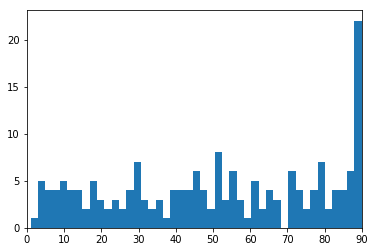

Everton


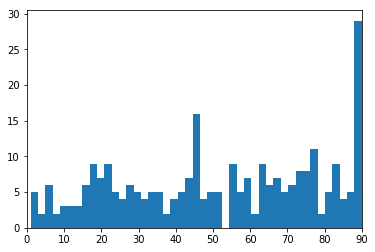

Evian Thonon Gaillard


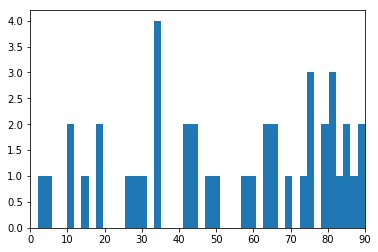

FC Cologne


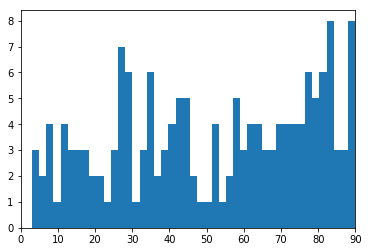

Fiorentina


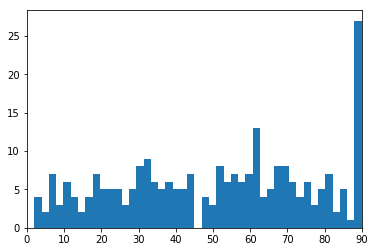

Freiburg


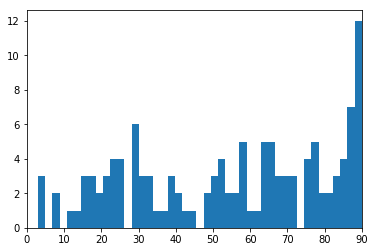

Frosinone


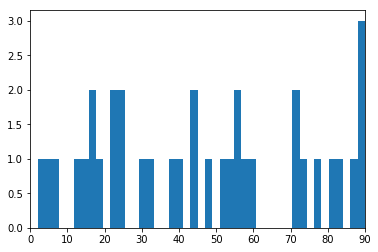

Fulham


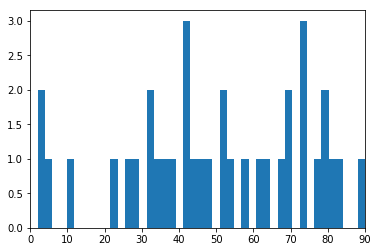

GFC Ajaccio


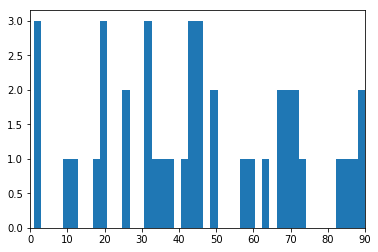

Genoa


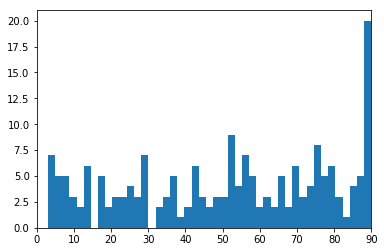

Getafe


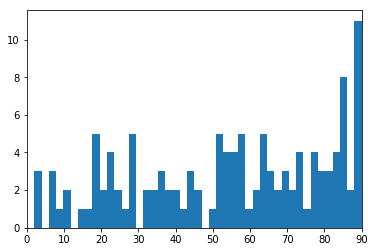

Girona


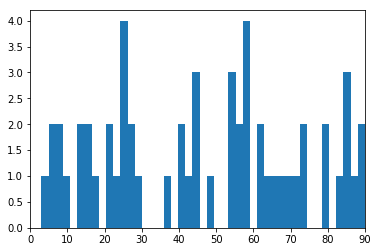

Granada


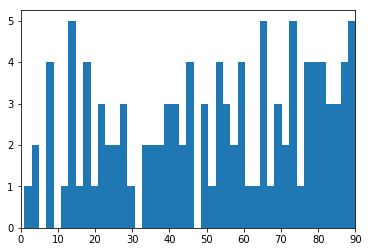

Guingamp


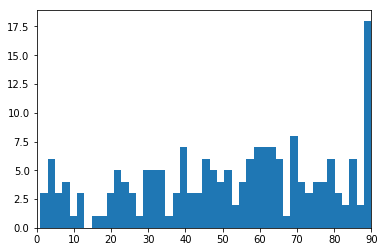

Hamburger SV


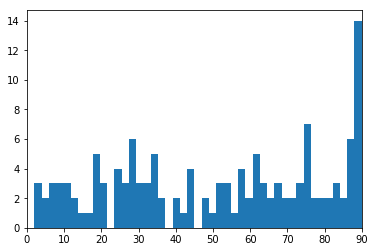

Hannover 96


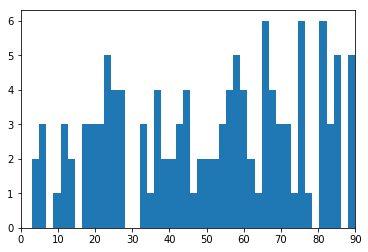

Hertha Berlin


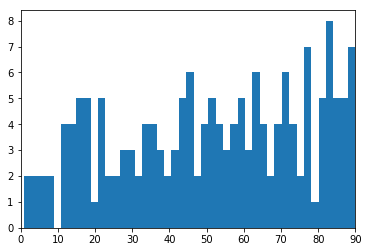

Hoffenheim


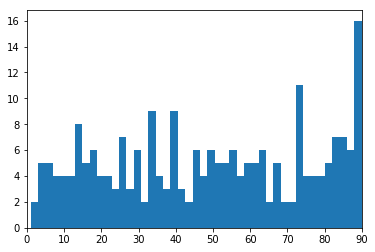

Huddersfield


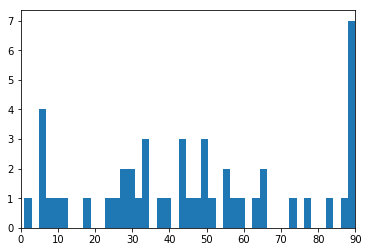

Hull


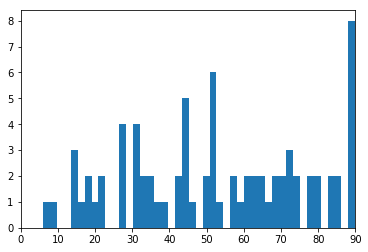

Ingolstadt


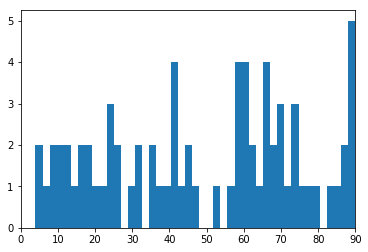

Inter


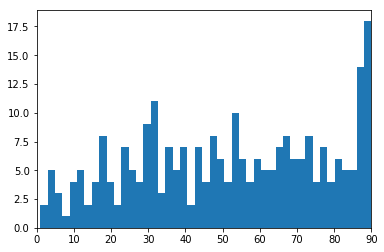

Juventus


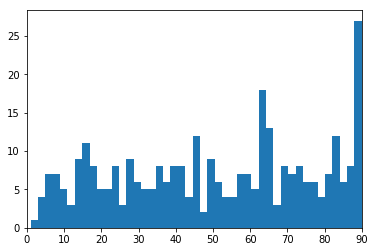

Las Palmas


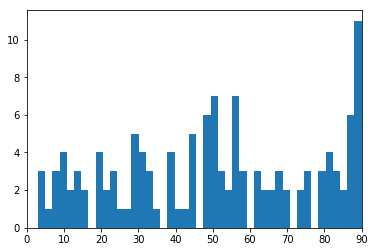

Lazio


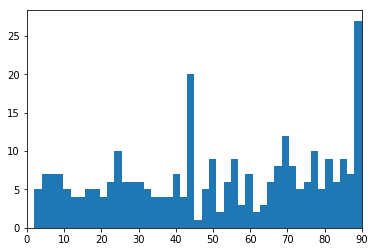

Leganes


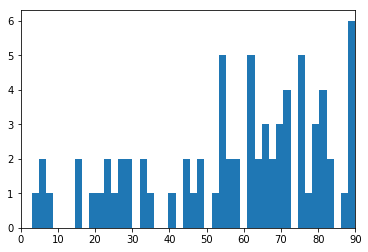

Leicester


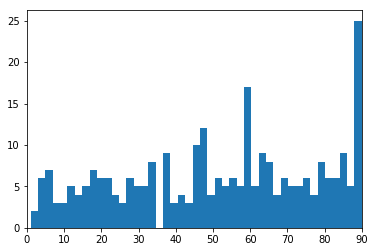

Lens


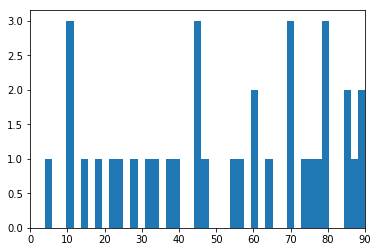

Levante


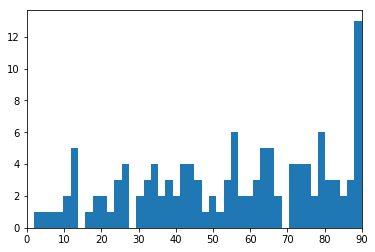

Lille


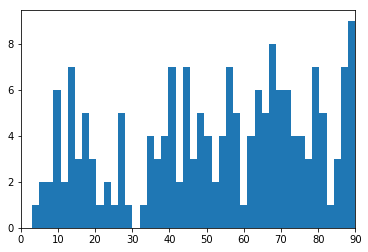

Liverpool


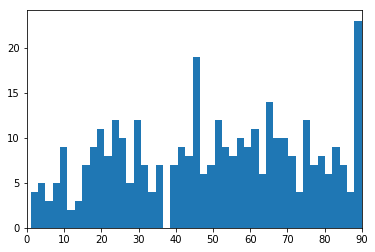

Lorient


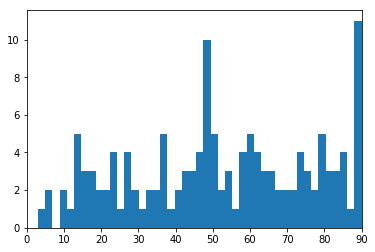

Lyon


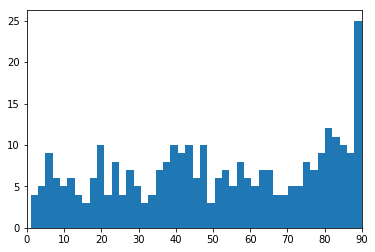

Mainz 05


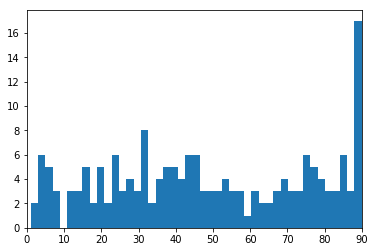

Malaga


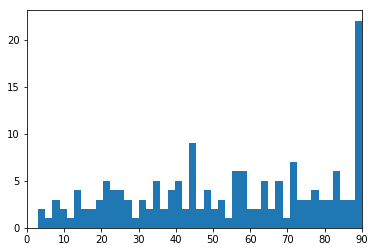

Manchester City


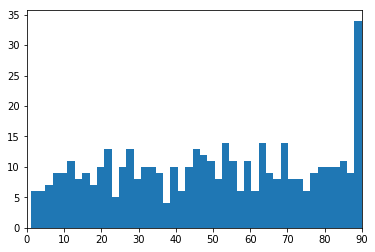

Manchester United


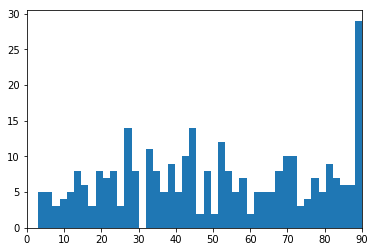

Marseille


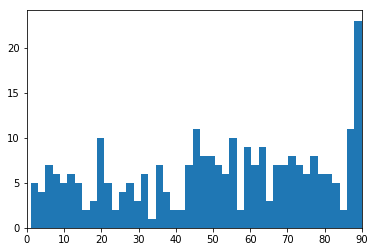

Metz


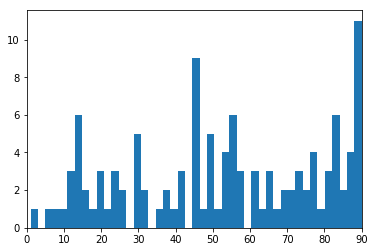

Middlesbrough


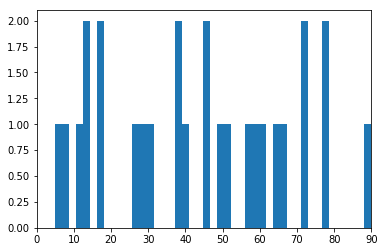

Monaco


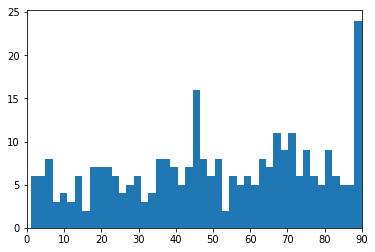

Montpellier


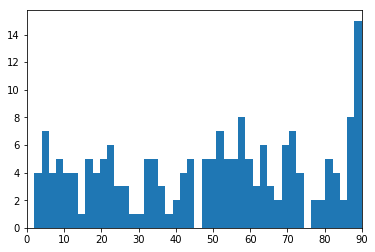

Nancy


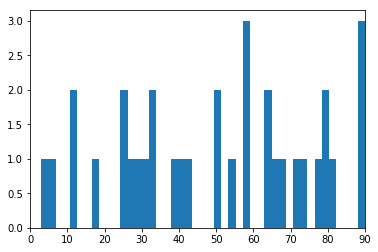

Nantes


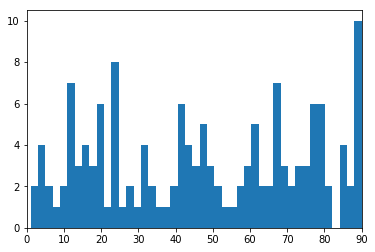

Newcastle United


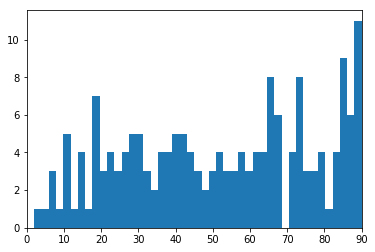

Nice


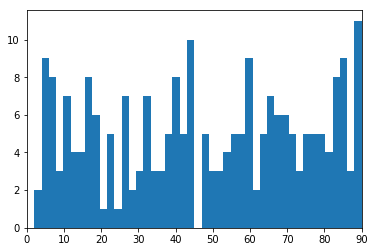

Nimes


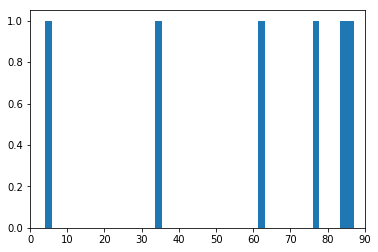

Norwich


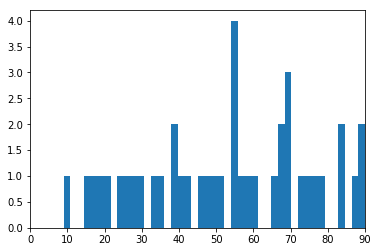

Osasuna


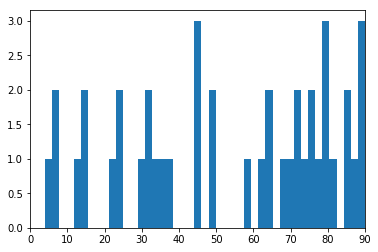

Paderborn


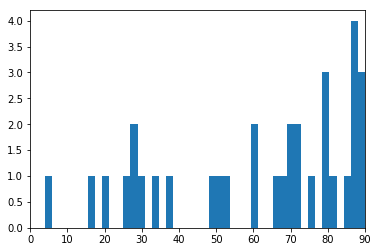

Palermo


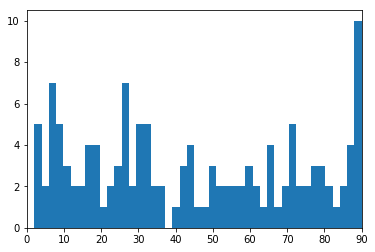

Paris Saint Germain


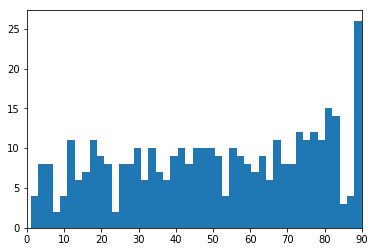

Parma


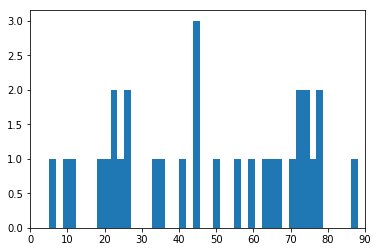

Parma Calcio 1913


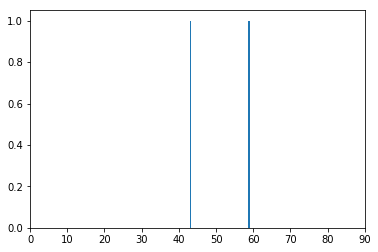

Pescara


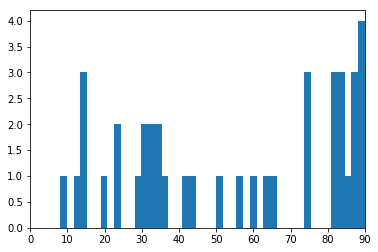

Queens Park Rangers


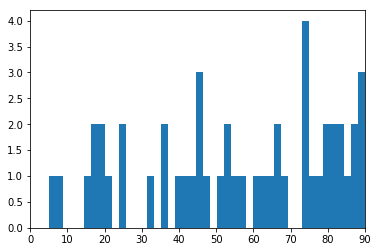

RasenBallsport Leipzig


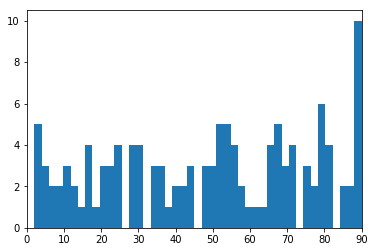

Rayo Vallecano


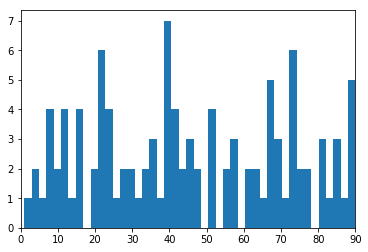

Real Betis


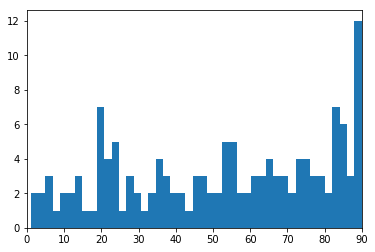

Real Madrid


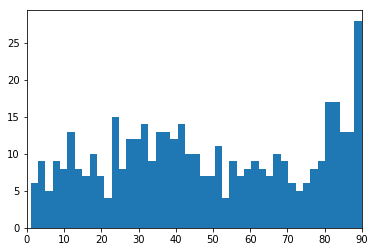

Real Sociedad


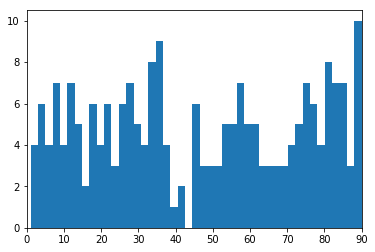

Reims


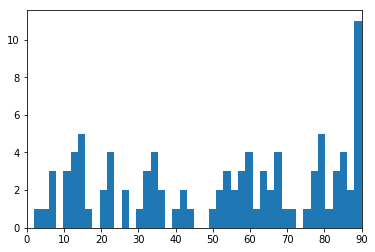

Rennes


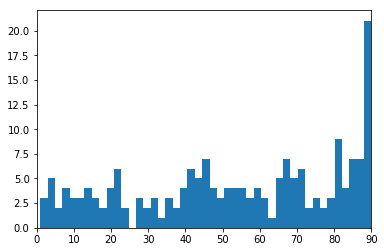

Roma


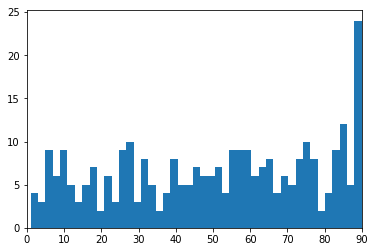

SC Bastia


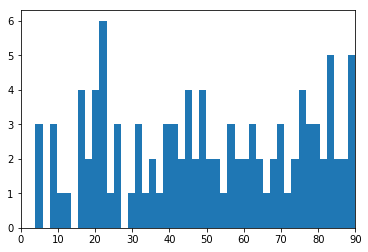

SD Huesca


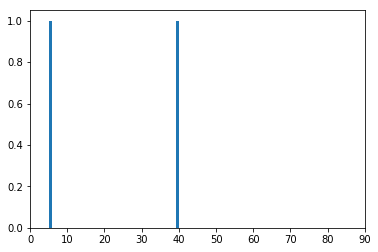

SPAL 2013


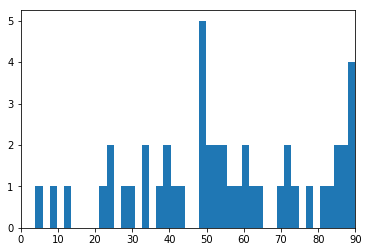

SSC Napoli


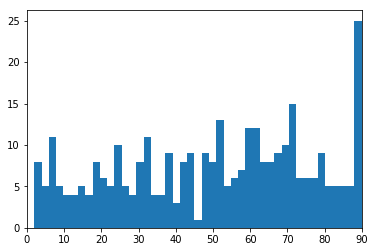

Saint-Etienne


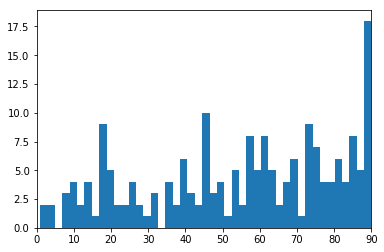

Sampdoria


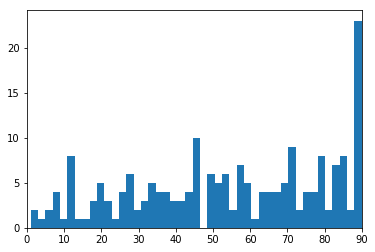

Sassuolo


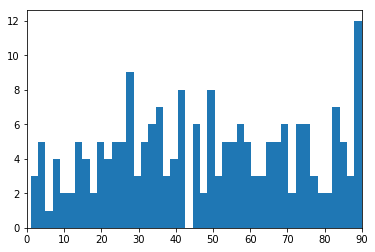

Schalke 04


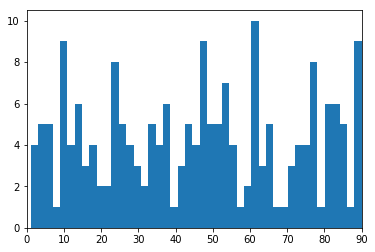

Sevilla


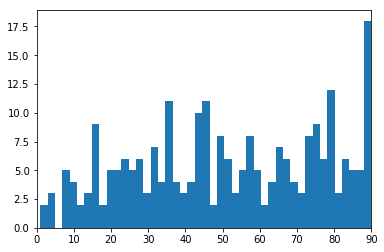

Southampton


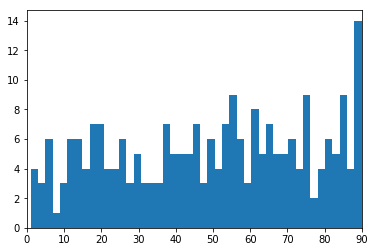

Sporting Gijon


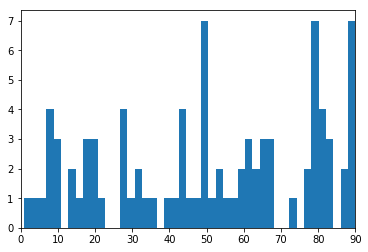

Stoke


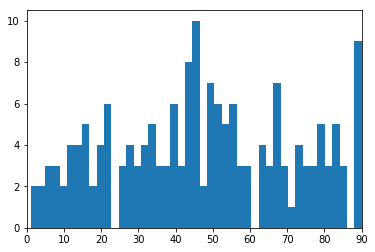

Strasbourg


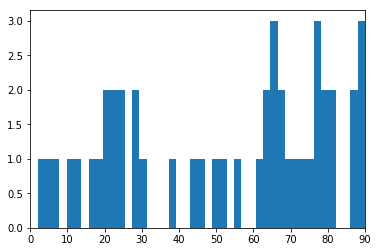

Sunderland


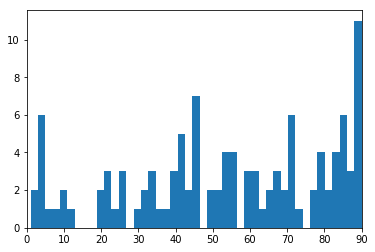

Swansea


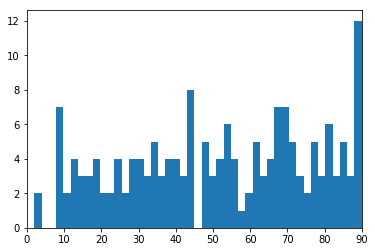

Torino


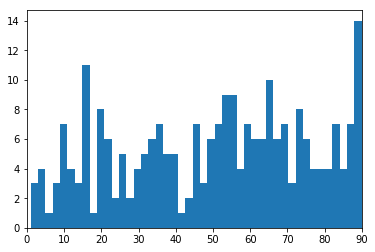

Tottenham


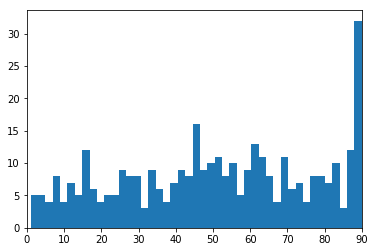

Toulouse


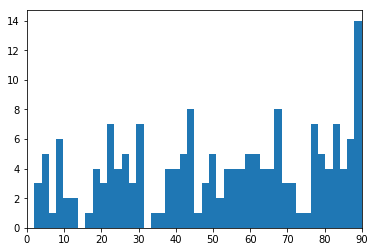

Troyes


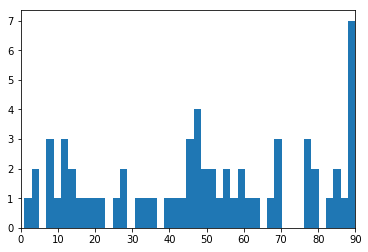

Udinese


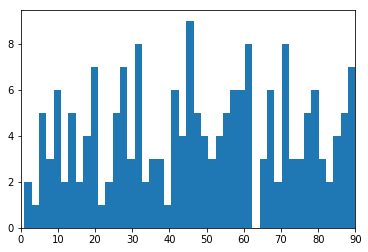

Valencia


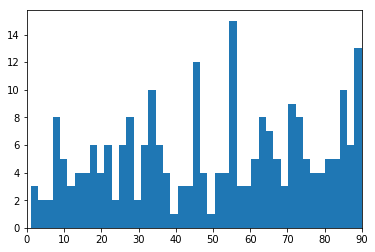

Verona


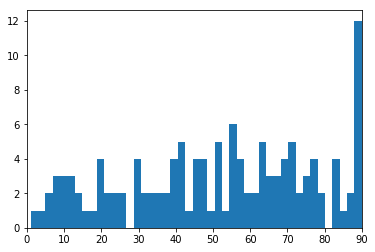

VfB Stuttgart


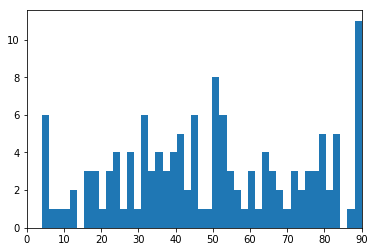

Villarreal


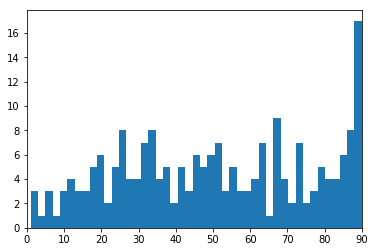

Watford


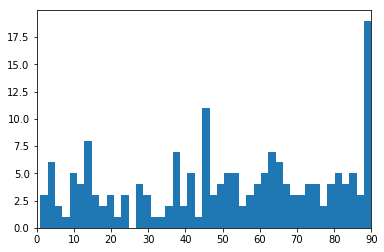

Werder Bremen


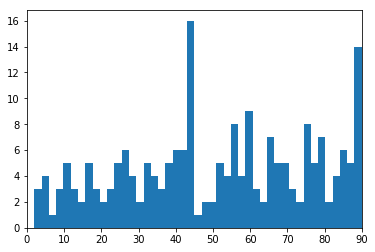

West Bromwich Albion


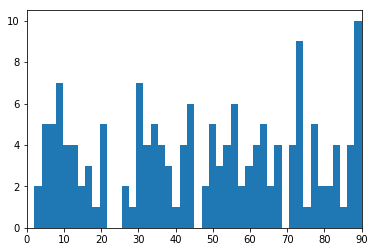

West Ham


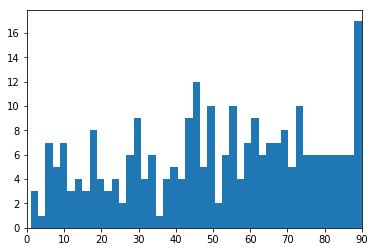

Wolfsburg


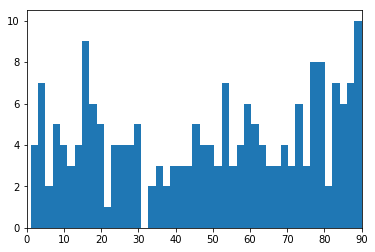

Wolverhampton Wanderers


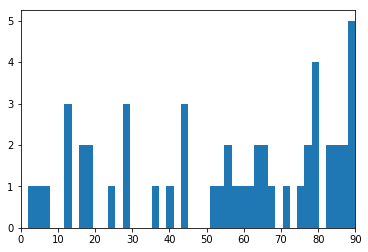

In [28]:
groups = df_goals_per_team.groupby(['FullName'])

print(groups.head())
groups.describe()
import matplotlib.pyplot as plt
for group in groups:
    #figure()
    #plt.
    print(group[1].FullName.values[0])
    plt.hist(group[1].Minute, bins=45)
    #cumulative=1, density=True, histtype='step'
    axes = plt.gca()
    axes.set_xlim([0,90])
    #axes.set_ylim([0,50])
    plt.show()

In [36]:
stmt = "SELECT * FROM Corners"
df_corners = pd.read_sql(stmt,conn)
#df_corners = df_corners['Minute'].notnull()
print(df_corners.shape)
df_corners.head()

stmt = "SELECT * FROM Matches"
df_matches = pd.read_sql(stmt,conn)
print(df_matches.shape)
df_matches.head()

result = pd.merge(df_corners.set_index("MatchId"),df_matches.set_index("ExternalId"), how='left')
#result_1718 = result[result.Season == '2017/2018']

#premier_league = result[(result['Season']  == '2017/2018') & (result['League']  == 'Premier League')]
premier_league = result[ (result['Season'] == '2017/2018') & (result['League'] == 'Ligue 1')]

print(result.shape)

#groups = premier_league.groupby(['MatchId'])
#groups.groups.keys()
#df_goals.head()
#groups = df_corners.groupby(['MatchId'])
#groups.groups.keys()
df_goals.head()

minutes_sum = df_corners.groupby(['MatchId', 'TeamId']).apply(
    lambda x: "{%s}" % ', '.join(x.Minute + ' '))
#minutes_sum = df_corners.groupby('MatchId')['MatchId', 'TeamId','Minute']
#print(premier_league[:10].head())
#print(result_premier_league_1718)
premier_league_minutes = premier_league[premier_league['Minute'].notnull()]
print(premier_league_minutes.shape)
minutes_sum
#print(list(premier_league_minutes.columns.values))

(78204, 6)
(7836, 10)
(78204, 13)
(380, 13)


MatchId  TeamId
1709697  9837                                                  {52 }
         9847                              {15 , 44 , 51 , 73 , 90 }
1709698  7794                                                  {36 }
         8592                                   {20 , 20 , 43 , 52 }
1709699  4087                              {21 , 67 , 83 , 84 , 88 }
         7819                         {19 , 30 , 54 , 58 , 60 , 63 }
1709700  9747                                   {24 , 45 , 54 , 58 }
         9853                              {20 , 23 , 37 , 52 , 75 }
1709701  8550                                        {12 , 63 , 63 }
         8639                {9 , 11 , 26 , 36 , 40 , 71 , 85 , 87 }
1709702  9748                               {6 , 18 , 45 , 48 , 23 }
         9851                                                  {60 }
1709703  8689                                   {38 , 42 , 46 , 81 }
         9829      {19 , 20 , 43 , 43 , 49 , 50 , 50 , 54 , 71 , ...
1709704  10249    

In [37]:
stmt = "SELECT * FROM Goals"
# Excute Query here
df_goals = pd.read_sql(stmt,conn)
print(df_goals.shape)
df_goals.head()


(22244, 8)


,Id,MatchId,ExternalId,Minute,ScorerId,AssistId,Type,TeamId
0,1,1723982,3647567,35,26777,35345,header,9826
1,2,1723985,3649433,23,246575,156008,shot,8650
2,3,1723983,3652629,14,37240,24372,shot,8191
3,4,1723984,3645927,20,32448,None,shot,8668
4,5,1723982,3647657,45,46539,50047,header,9825


In [38]:
print(df_matches.shape)
print(df_goals.shape)
goals = pd.merge(df_matches.set_index("ExternalId"), df_goals.set_index("MatchId"),  how='left')
#result = goals[goals['Minute'].notnull()]
print(goals.shape)
#group by season
premier_league = goals[(goals['League'] == 'Premier League') & (goals['Season'] == '2016/2017')]
premier_league.head()

premier_league['Minute'] = premier_league['Minute'].astype(int)
#premier_league.loc[premier_league['Minute']] = premier_league['Minute'].astype(int)

for number in range(0, 90, 10):
    from_minute = number
    to_minute = number + 10
    goals_by_minute = premier_league.groupby(['TeamId'])['Minute'].apply(
        lambda x: len(x.where(
            lambda y : y > from_minute).where(lambda z:z < to_minute).dropna()))   
    #print(goals)
    #with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
       # print(goals)
#goals_teams = goa
#len(teams.groups)
premier_league.head(2)

(7836, 10)
(22244, 8)
(7836, 15)


c:\users\martin\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Id,Date,Country,League,Season,Stage,Player_Id,AwayTeam_Id,HomeTeam_Id,ExternalId,Minute,ScorerId,AssistId,Type,TeamId
760,761,2016-08-15 15:00:00,England,Premier League,2016/2017,1,None,1544,1545,4453319,7,278343,26554,distance,8197
761,762,2016-08-15 15:00:00,England,Premier League,2016/2017,1,None,1546,1547,4453624,19,278343,286119,shot,8197


In [39]:
result = pd.merge(df_matches.set_index("ExternalId"), df_corners.set_index("MatchId"),  how='left')
#premier_league = result[(result['Season']  == '2017/2018') & (result['League']  == 'Premier League')]
premier_league = result[ (result['Season'] == '2017/2018') & (result['League'] == 'Ligue 1')]
#print(result.shape)


#teams_coreners = df_corners.groupby('TeamId')
goal_matches = pd.merge(df_corners.set_index("MatchId"), df_matches.set_index("ExternalId"), how='right')

#goal_matches_home_team = pd.merge(goal_matches.set_index("HomeTeam_Id"), df_teams.set_index("ExternalId"), how='left')
#goal_matches_home_team.rename(columns={'Ful': 'FullNameHome'}, inplace=True)
#goal_matches_home_team.rename(columns={'Acronym': 'AcronymHome'}, inplace=True)
#goal_matches_home_team.rename(columns={'TeamId': 'HomeTeamId'}, inplace=True)
#goal_matches_home_team_away_team = pd.merge(goal_matches_home_team.set_index("AwayTeam_Id"), df_teams.set_index("ExternalId"), how='left')
#goal_matches_home_team_away_team
#goal_matches_home_team
result.head(2)
#goal_matches_home_team_away_team
#['Minute','TeamId'].apply(
#    lambda x: "{%s}" % ', '.join(x.Minute + ' ' + x.TeamId))
#minutes_sum = result.groupby(['TeamId'], as_index=True)['Minute']hg
#minutes_sum
#['Minute']
#minutes_sum = df_corners.groupby('MatchId')['MatchId', 'TeamId','Minute']
#print(premier_league[:10].head())
#print(result_premier_league_1718)
#premier_league_minutes = premier_league[premier_league['Minute'].notnull()]
#print(premier_league_minutes.shape)
#minutes_sum.first()
#print(list(premier_league_minutes.columns.values))

,Id,Date,Country,League,Season,Stage,Player_Id,AwayTeam_Id,HomeTeam_Id,ExternalId,Minute,Player1,TeamId
0,1,2014-08-18 15:00:00,England,Premier League,2014/2015,1,None,15,12,3647429,15,37436,9825
1,2,2014-08-18 15:00:00,England,Premier League,2014/2015,1,None,14,10,3649357,9,30618,8650


In [40]:
goals = pd.merge( df_matches.set_index("ExternalId"), df_goals.set_index("MatchId"), how='left')
#result = goals[goals['Minute'].notnull()]
print(result.shape)
premier_league = goals[(goals['League'] == 'Premier League') & (goals['Season'] == '2016/2017')]
premier_league.head(2)

#premier_league['Minute'] = premier_league['Minute'].astype(int)
#premier_league.loc[premier_league['Minute']] = premier_league['Minute'].astype(int)

#premier_league['TeamId'].hist(by=premier_league['Minute'])

# for number in range(0, 90, 10):
#     from_minute = number
#     to_minute = number + 10
#     goals = premier_league.groupby(['TeamId'])['Minute'].apply(lambda x: len(x.where(lambda y : y > from_minute).where(lambda z:z < to_minute).dropna()))   
#     print(goals)
# #goals_teams = goa
# #len(teams.groups)

#print(teams.groups.keys())

(7836, 13)


,Id,Date,Country,League,Season,Stage,Player_Id,AwayTeam_Id,HomeTeam_Id,ExternalId,Minute,ScorerId,AssistId,Type,TeamId
760,761,2016-08-15 15:00:00,England,Premier League,2016/2017,1,None,1544,1545,4453319,7,278343,26554,distance,8197
761,762,2016-08-15 15:00:00,England,Premier League,2016/2017,1,None,1546,1547,4453624,19,278343,286119,shot,8197


In [41]:
#groups = df_goals.groupby(['MatchId'])
#groups.groups.keys()
#df_goals.head()
minutes_sum = df_goals.groupby(['MatchId', 'TeamId',], as_index=True, sort=True)
#minutes_sum.last()
minutes_sum.count()
#print(minutes_sum.shape)
#df_goals.head(10)
#groups.groups['1709877']
#minutes_sum.groups
#result = minutes_sum.get_group(('1709702','9748'))

Id  ExternalId  Minute  ScorerId  AssistId  Type
MatchId TeamId                                                  
1709697 9837     2           2       2         2         2     2
        9847     3           3       3         3         2     3
1709698 7794     4           4       4         4         1     2
        8592     2           2       2         2         1     1
1709699 7819     3           3       3         3         2     3
1709700 9853     2           2       2         2         0     1
1709702 9748     2           2       2         2         1     1
1709703 8689     2           2       2         2         1     1
        9829     1           1       1         1         0     0
1709704 9827     1           1       1         1         1     1
1709705 9830     1           1       1         1         1     1
1709706 9831     3           3       3         3         3     3
        9941     2           2       2         2         2     2
1709707 9827     4           4       4         4         2     2
        9829     1           1       1         1         1     1
1709708 8639     1           1       1         1         0     0
1709709 9747     1           1       1         1         0     1
1709711 10249    2           2       2         2         2     2
        8592     1           1       1         0         0     0
1709712 8550     1           1       1         1         0     0
        9830     1           1       1         1         0     1
1709713 9847     2           2       2         2         2     2
1709714 4087     2           2       2         2         1     2
        9851     6           6       6         6         6     6
1709715 9853     4           4       4         4         2     3
1709716 9748     1           1       1         1         1     1
        9941     3           3       3         2         1     2
1709717 7794     1           1       1         1         0     0
1709719 8592     1           1       1         1         1     1
1709720 8639     2           2       2         2         0     2
...             ..         ...     ...       ...       ...   ...
2844469 8633     4           4       4         4         2     2
2844470 8558     2           2       2         2         1     2
2844471 9906     1           1       1         1         1     1
2844473 8305     2           2       2         2         1     2
2846841 8524     4           4       4         4         4     4
2846842 8547     1           1       1         1         1     1
2846843 8533     3           3       3         3         1     1
        9885     2           2       2         2         2     2
2846844 8534     2           2       2         2         1     2
2846845 8543     1           1       1         1         1     1
        9875     2           2       2         2         2     2
2846847 674792   2           2       2         2         1     2
        8600     2           2       2         2         1     1
2846848 7943     1           1       1         1         0     0
2846849 8686     1           1       1         1         1     1
2846851 7943     2           2       2         2         1     1
        8529     2           2       2         2         2     2
2846852 8533     1           1       1         1         1     1
        8535     6           6       6         6         4     6
2846854 10233    2           2       2         2         2     2
        8534     1           1       1         1         1     1
2846855 8636     2           2       2         2         2     2
        9804     2           2       2         2         1     2
2846856 9885     2           2       2         2         1     2
2846857 8564     2           2       2         2         2     2
        9875     3           3       3         3         2     3
2846858 8524     3           3       3         3         2     3
        8686     3           3       3         3         2     3
2846859 8547     1           1       1         1   

In [42]:
# def get_last_matches(date, team, x = 10):
#     ''' Get the last x matches of a given team. '''
    
#     #Filter team matches from matches
#     team_matches = df_matches[(df_matches['HomeTeam'] == team) | (df_matches['AwayTeam'] == team)].drop_duplicates(['ExternalId'])
#     team_matches['ExternalId'] = team_matches['ExternalId'].astype(int)
#     #Filter x last matches from team matches
#     last_matches = team_matches[team_matches.Date < date].sort_values(by = 'Date', ascending = False).iloc[0:x,:]

#     #Return last matches
#     return last_matches

# last_matches = get_last_matches("2018-08-27 15:00:00", "Arsenal")
# last_matches.head()